![Imgur](https://i.imgur.com/Xlq92I8.png)

## ①　Introduction
The dataset contains information about golf club members and their golf-related and weather-related statistics.

🎯　Your goal is to **detect the anomalies** in that golf club records.

You are free to add/remove sections and made any modification to this notebook. Only your final submission will be graded. This notebook will not be graded.

## ②　Setting Up the Environment
These are some of the libraries used in the lecture.

In [1]:
# Basic Libraries (L1)
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy  as np
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing (L2)
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, OneHotEncoder

# Data Exploration (L3)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint, norm, lognorm, expon, uniform, gamma
from scipy.stats import probplot, chi2_contingency

# Basic Classifiers & Regressors (L4-5)
from sklearn.dummy        import DummyClassifier,        DummyRegressor

# Model Selection & Validation (L7)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold, LeaveOneOut

# Hyperparameter Optimization (L7)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Pipeline (L9)
from imblearn.pipeline       import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer

# Feature Selection (L9)
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel
from sklearn.feature_selection import f_classif, f_regression, chi2
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector

# Dimensionality Reduction (L9)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition         import PCA, KernelPCA
from sklearn.manifold              import TSNE, MDS, Isomap
from umap                          import UMAP

# Clustering (L10)
from sklearn.cluster          import KMeans, MiniBatchKMeans
from sklearn.cluster          import AgglomerativeClustering
from sklearn.cluster          import DBSCAN, OPTICS, MeanShift
from sklearn.metrics          import silhouette_score, silhouette_samples
from sklearn.metrics          import calinski_harabasz_score, make_scorer

# Anomaly Detection (L11)
!pip install pyod --quiet
from pyod.models.knn     import KNN
from pyod.models.iforest import IForest
from pyod.models.lof     import LOF

## ③　Loading (Training) Dataset

In [2]:
# Load the train dataset
train_url = "/kaggle/input/detection-of-falsified-golf-players-records/train.csv"
df_train = pd.read_csv(train_url, index_col=0)

target_col = 'Outlier'
X_train = df_train.copy()

df_train

,YearsOfExperience,HandicapIndex,AvgDrivingDistance,AveragePuttsPerRound,DrivingAccuracy,GreensInRegulation,TournamentWins,PreferredTemperature,PreferredHumidity,PreferredWindSpeed,RainTolerance,SunlightPreference,PreferredCloudCover,ExtremeTempComfort
MembershipID,,,,,,,,,,,,,,
AK39205,5.8,18.9,315.0,37.3,48.1,58.0,0,68.9,78,3.0,0.0,8.4,76.6,4.2
CY14365,5.2,12.5,244.8,29.8,76.1,55.1,1,50.0,43,3.9,6.8,3.4,62.6,3.4
PR52596,5.9,14.0,270.5,31.9,53.3,62.2,0,50.6,40,3.5,8.8,2.1,21.6,8.0
OK30685,6.7,32.6,159.2,39.8,54.3,67.9,1,80.2,41,9.3,10.5,9.3,56.7,8.3
JT59321,7.7,15.5,326.7,34.4,45.9,50.2,0,64.5,56,2.3,6.5,0.4,61.9,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KF85677,5.4,17.2,319.1,34.3,30.7,49.6,0,77.2,50,1.5,8.2,5.3,46.7,8.0
WG22942,17.0,5.4,281.9,28.5,94.7,93.9,1,66.1,45,4.5,8.3,7.1,55.6,7.1
BY75476,1.0,3.1,413.5,29.1,98.3,101.1,0,103.2,99,1.9,10.7,9.6,85.8,10.8


## ④　Exploratory Data Analysis (Before Preprocessing)

In [3]:
# Perform EDA here if you want.
print(df_train.info())
df_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 6647 entries, AK39205 to KD57518
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   YearsOfExperience     6647 non-null   float64
 1   HandicapIndex         6647 non-null   float64
 2   AvgDrivingDistance    6647 non-null   float64
 3   AveragePuttsPerRound  6647 non-null   float64
 4   DrivingAccuracy       6647 non-null   float64
 5   GreensInRegulation    6647 non-null   float64
 6   TournamentWins        6647 non-null   int64  
 7   PreferredTemperature  6647 non-null   float64
 8   PreferredHumidity     6647 non-null   int64  
 9   PreferredWindSpeed    6647 non-null   float64
 10  RainTolerance         6647 non-null   float64
 11  SunlightPreference    6647 non-null   float64
 12  PreferredCloudCover   6647 non-null   float64
 13  ExtremeTempComfort    6647 non-null   float64
dtypes: float64(12), int64(2)
memory usage: 778.9+ KB
None


,YearsOfExperience,HandicapIndex,AvgDrivingDistance,AveragePuttsPerRound,DrivingAccuracy,GreensInRegulation,TournamentWins,PreferredTemperature,PreferredHumidity,PreferredWindSpeed,RainTolerance,SunlightPreference,PreferredCloudCover,ExtremeTempComfort
count,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000,6647.000000
mean,11.675658,12.946081,257.622070,30.450790,63.545946,62.206018,0.739582,64.851723,55.571386,2.568121,5.581074,5.901685,54.955077,5.788461
std,9.739317,6.726676,49.811026,3.690301,16.044785,16.416454,1.339700,8.632683,14.757024,1.532424,2.716501,2.391302,16.325393,2.475410
min,0.400000,-0.100000,141.900000,19.400000,8.700000,7.600000,0.000000,46.400000,20.000000,0.200000,-3.000000,-2.300000,5.000000,-2.000000
25%,4.300000,7.900000,215.900000,27.500000,52.800000,51.100000,0.000000,59.700000,45.000000,1.400000,3.600000,4.500000,43.700000,4.050000
50%,8.400000,13.800000,252.500000,30.300000,62.200000,60.600000,0.000000,65.100000,56.000000,2.200000,5.900000,6.300000,55.600000,6.100000
75%,16.300000,17.400000,309.000000,33.000000,71.700000,71.100000,1.000000,70.200000,65.000000,3.400000,7.800000,7.600000,66.500000,7.700000
max,40.000000,42.800000,424.500000,48.200000,118.400000,101.900000,12.000000,109.100000,118.000000,9.300000,14.000000,12.200000,115.300000,13.200000


## ⑤　Preprocessing Pipeline

In [4]:
# Create ColumnTransformer for preprocessing
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('std_scaler', StandardScaler(), numerical_cols),
    ('ohe', OneHotEncoder(), categorical_cols)
    ], remainder='passthrough')

# Making Transformation Pipeline
transformation_pipeline = make_pipeline(
    preprocessor # You can add dimensionality reduction or feature selection here
)

# Preprocess Data
X_processed = transformation_pipeline.fit_transform(X_train)

## ⑥　Exploratory Data Analysis (After Preprocessing)

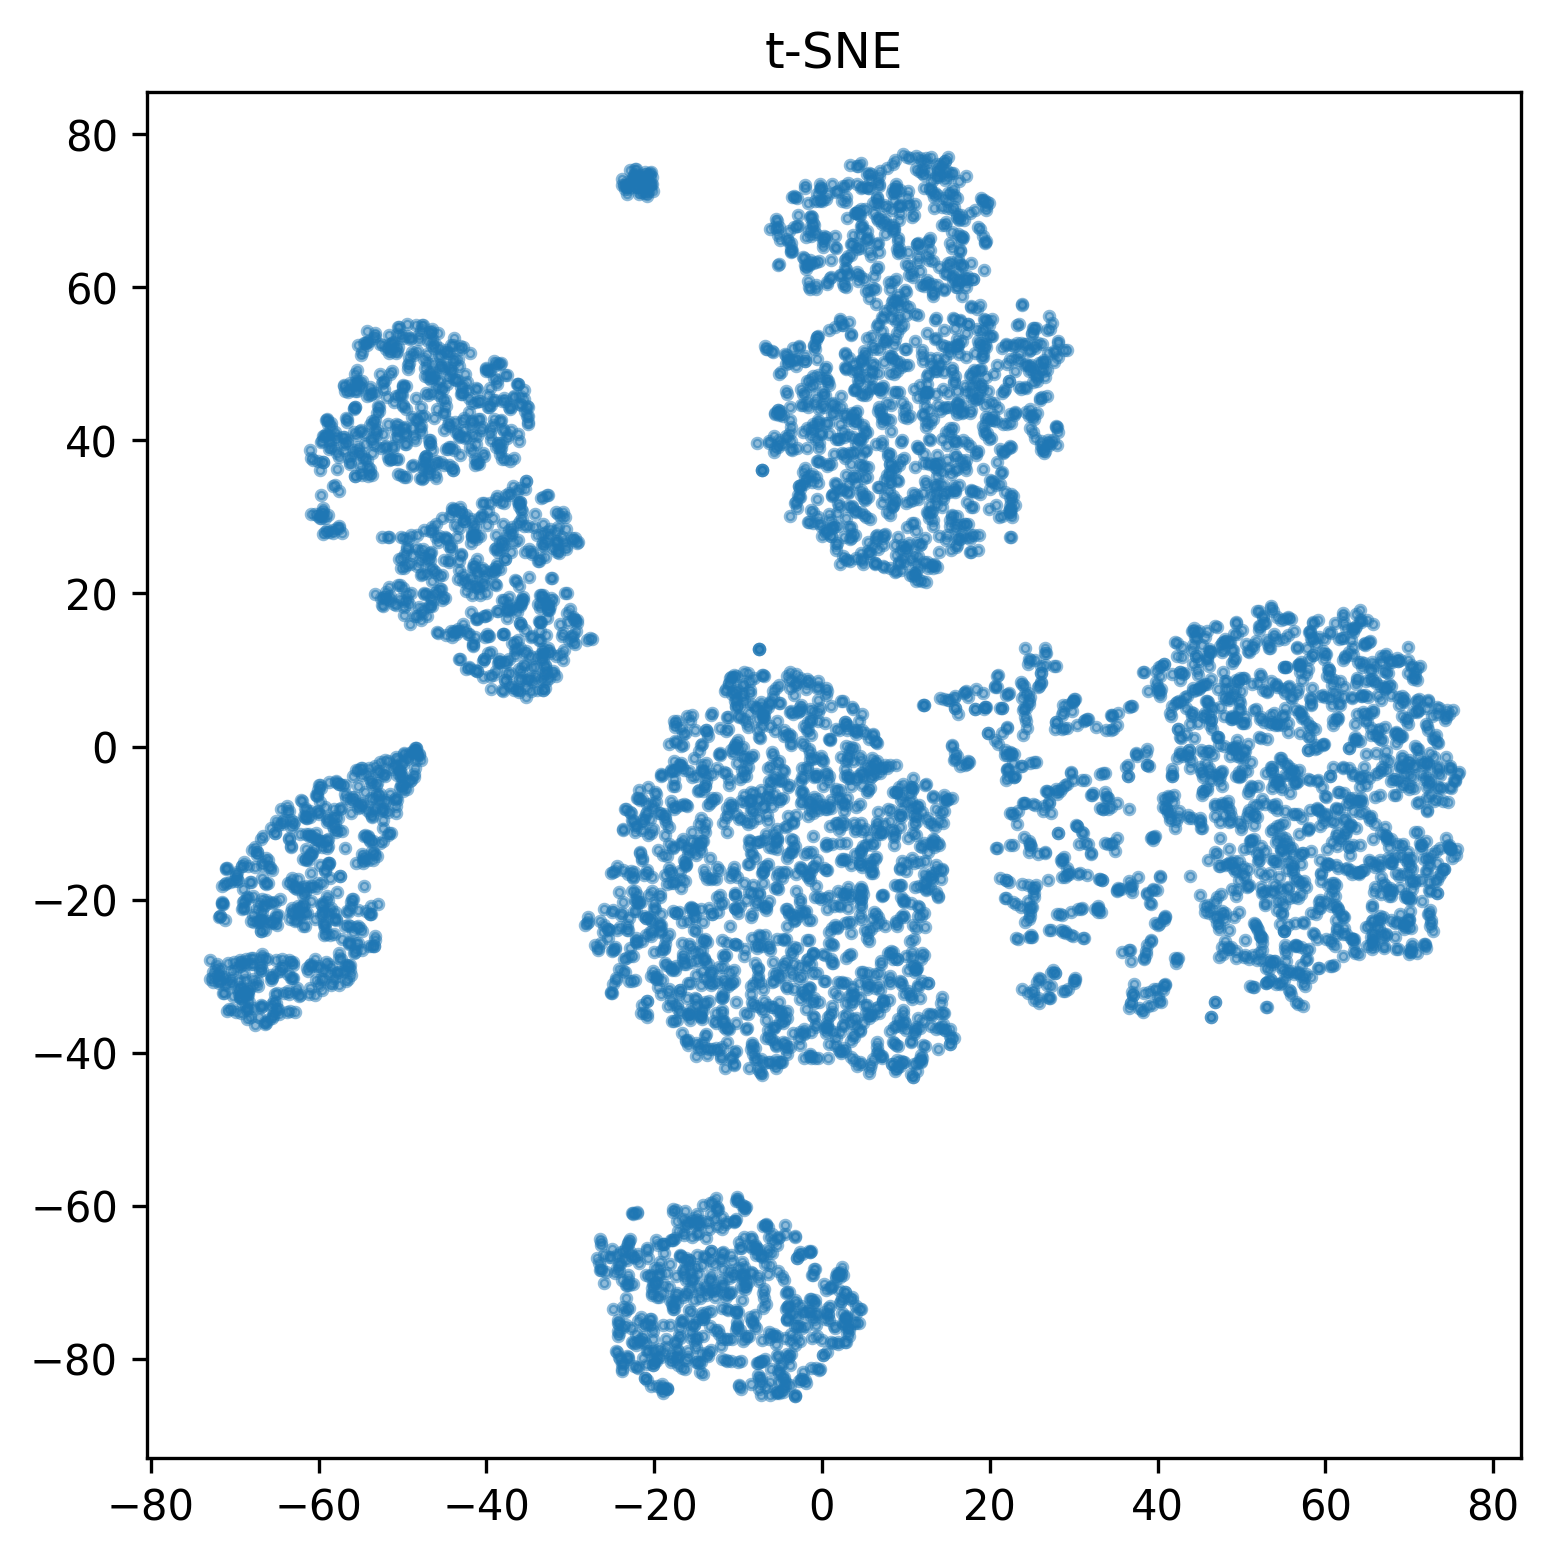

In [5]:
# Initialize dimensionality reduction methods
methods = [
    ('t-SNE', TSNE(n_components=2, random_state=0)),
    #('UMAP', UMAP(n_components=2, random_state=0)),
    #('MDS', MDS(n_components=2, random_state=0)),
    #('Isomap', Isomap(n_components=2))
]

# Plotting
plt.figure(figsize=(10, 10), dpi=300)

for i, (title, method) in enumerate(methods, 1):
    X_transformed = method.fit_transform(X_processed)
    plt.subplot(2,2, i)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=5, alpha=0.5)
    plt.title(title)

plt.tight_layout()
plt.show()

## ⑦　(Optional) Manual Hyperparameter Tuning 
Here, the goal is to see how good the clustering score is when the anomalies are deleted. The better the clusters are, usually, the better the anomaly detection.

In [6]:
# Define the range for 'n_neighbors' for KNN
n_neighbors_range = range(1, 10)  # for example, trying values from 1 to 9

# Initialize variables to store the best score and the corresponding 'n_neighbors'
best_score = -np.inf
best_n_neighbors = 0

# The number of clusters for KMeans is fixed at 6
n_clusters = 6

# Iterate over the range of 'n_neighbors'
for n_neighbors in n_neighbors_range:
    # Anomaly Detection with KNN
    knn = KNN(n_neighbors=n_neighbors)
    knn.fit(X_processed)

    # Get the prediction labels (0: normal, 1: anomaly)
    labels = knn.labels_

    # Remove anomalies
    X_cleaned = X_processed[labels == 0]

    # Create and fit the KMeans model
    model = KMeans(n_clusters=n_clusters, random_state=41)
    model.fit(X_cleaned)

    # Calculate the silhouette score
    score = silhouette_score(X_cleaned, model.labels_)

    # Update the best score and the corresponding 'n_neighbors' if the current score is better
    if score > best_score:
        best_score = score
        best_n_neighbors = n_neighbors

# Print the best 'n_neighbors' and the corresponding score
print("Best n_neighbors for KNN:", best_n_neighbors)
print("Best Silhouette Score:", best_score)

Best n_neighbors for KNN: 9
Best Silhouette Score: 0.2760367055012553


## ⑧　Making Prediction

In [7]:
model = KNN(n_neighbors=2)

# Fit the model to the training set
model.fit(X_processed)
anomalies = model.predict(X_processed)

# Predict probability (this is the same as normalized (0-1) anomaly score)
y_pred = model.predict_proba(X_processed)

## ⑨　Exploratory Data Analysis (After Anomaly Detection)

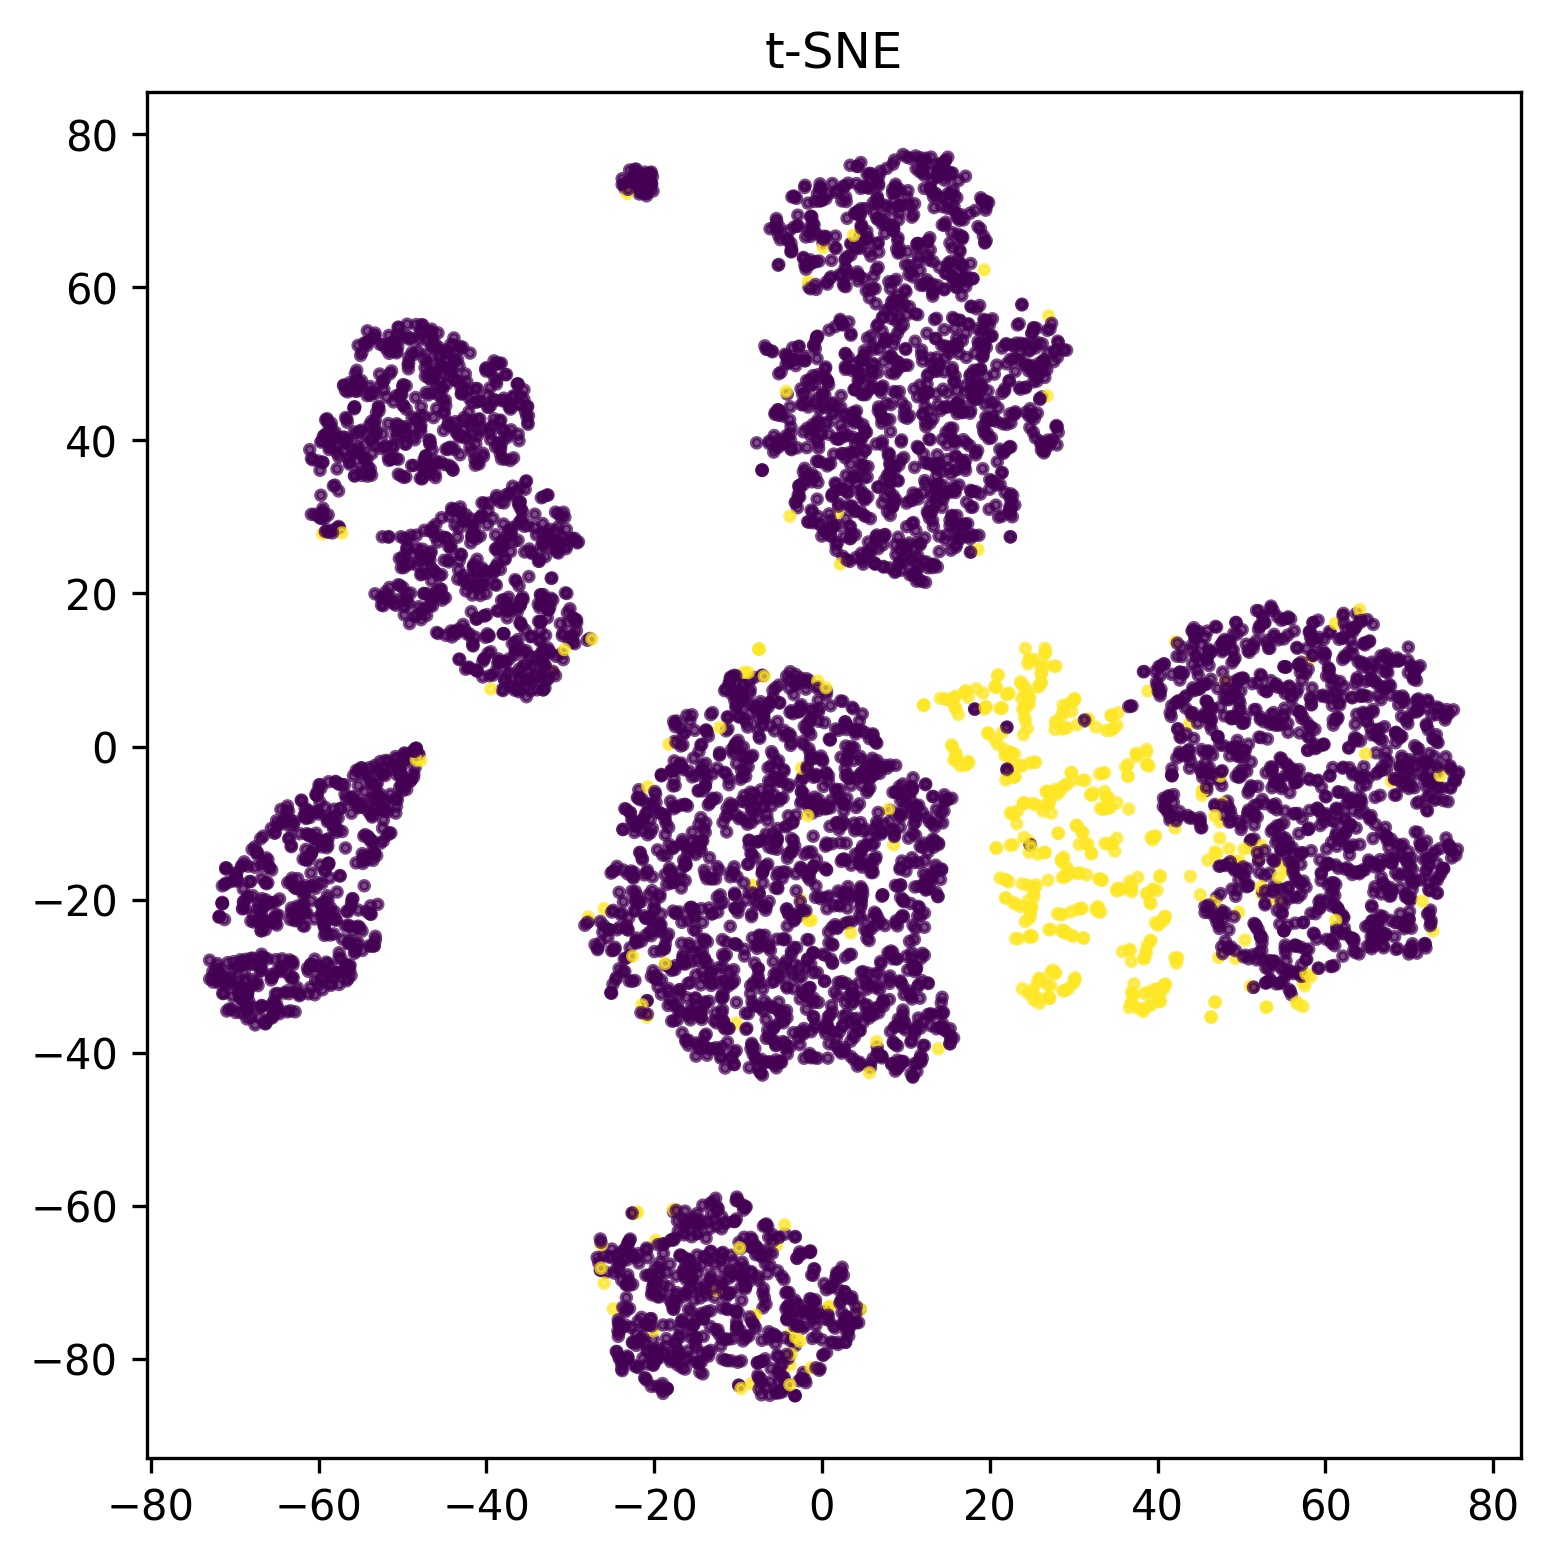

In [8]:
# Prepare your data
X_processed = preprocessor.fit_transform(X_train)

# Initialize dimensionality reduction methods
methods = [
    ('t-SNE', TSNE(n_components=2, random_state=0)),
    #('UMAP', UMAP(n_components=2, random_state=0)),
    #('MDS', MDS(n_components=2, random_state=0)),
    #('Isomap', Isomap(n_components=2))
]

# Plotting
plt.figure(figsize=(10, 10), dpi=300)

for i, (title, method) in enumerate(methods, 1):
    X_transformed = method.fit_transform(X_processed)
    plt.subplot(2, 2, i)
    plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=5, alpha=0.7, c=anomalies)
    plt.title(title)

plt.tight_layout()
plt.show()

## ⑩　Submitting the Prediction Probability

In [9]:
# Make DataFrame for Submission
submission = pd.DataFrame(y_pred[:,1], index=df_train.index, columns=[target_col])

# Make a CSV file for Submission
submission.to_csv('submission.csv')

submission

,Outlier
MembershipID,
AK39205,0.155378
CY14365,0.158459
PR52596,0.147312
OK30685,0.604741
JT59321,0.056045
...,...
KF85677,0.130877
WG22942,0.081880
BY75476,0.168513
